In [2]:
import numpy as np
import scipy.special 
from decimal import Decimal  
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

mpl.rcParams['figure.dpi']= 100

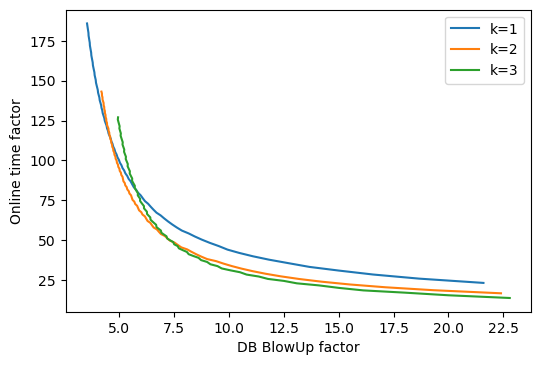

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [38,
  40,
  42,
  43,
  45,
  47,
  48,
  50,
  51,
  53,
  54,
  56,
  57,
  58,
  60,
  61,
  63,
  64,
  66,
  67,
  68,
  70,
  71,
  72,
  74,
  75,
  77,
  78,
  79,
  81,
  82,
  83,
  85,
  86,
  87,
  89,
  90,
  91,
  92,
  94,
  95,
  96,
  98,
  99,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  111,
  112,
  113,
  114,
  116,
  117,
  118,
  119,
  121,
  122,
  123,
  124,
  126,
  127,
  128,
  129,
  131,
  132,
  133,
  134,
  136,
  137,
  138,
  139,
  141,
  142,
  143,
  144,
  146,
  147,
  148,
  149,
  150,
  152,
  153,
  154

In [3]:
def prAtLeastChernoff(p, n, k):
    #a = float(k)/n - p
    a = k/n - p
    return np.power(np.power(p/(p+a),p+a)*np.power((1-p)/(1-p-a),1-p-a) ,n) 

def minBlockSizeForQueries(lam, p, q):
    errBits = 0
    # Starting block size for search
    B = np.int(q/(1-p))
    while errBits < lam:
        B+=1
        # upper bound on the error: Pr[#Erasures >= B - q + 1]
        errBits = -np.log2(prAtLeastChernoff(p, B, B - q + 1))
        if B > lam*q:
            raise Exception("Something wierd, block size B=lam*q is not enough" 
                            "B=%d,q=%d, errBits: %d" % (B, q, errBits))
    return B
    
def hybridTradeoff():
    # Security parameter
    lam = 128
    
    # Number of sets / \sqrt{n}
    for k in range(1,4):
        # Erasure probability 
        p = np.exp(-k)

        Q = np.arange(5,100)
        B = [minBlockSizeForQueries(lam, p, q) for q in Q]

        blowUp = k*(B/Q)
        # Online time also grows with block size since each sets becomes bigger
        onlineTime = Q*np.sqrt(B/Q)

        plt.plot( blowUp, onlineTime, label=("k=%d"%k))
        #plt.plot(blowup, Q)

    plt.xlabel("DB BlowUp factor")
    plt.ylabel("Online time factor")
    plt.legend()
    plt.show()

    return Q, B, onlineTime, blowUp

hybridTradeoff()


In [9]:
'''
 Some values:
 k=3
 [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 [38, 40, 42, 43, 45, 47, 48, 50, 51, 53, 54, 56, 57, 58, 60]

k=4
[ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
[30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49],
'''

'\n Some values:\n k=3\n [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),\n [38, 40, 42, 43, 45, 47, 48, 50, 51, 53, 54, 56, 57, 58, 60]\n\nk=4\n[ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),\n[30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47, 49],\n'

Actual Results

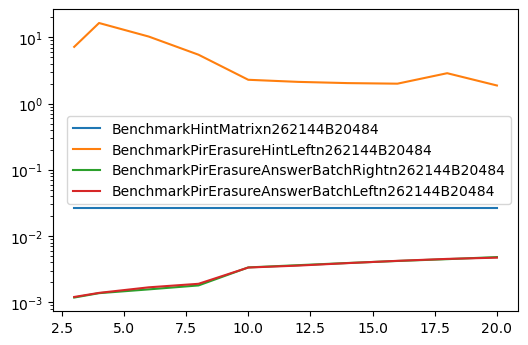

In [30]:
results = np.genfromtxt("res262144_k=4.csv", names=True)
for col_name in results.dtype.names[1:]:
    plt.plot(results[results.dtype.names[0]],results[col_name]/10**9, label=col_name)
plt.legend()
plt.yscale('log')
plt.show()


plt.legend()
Playing with number of sets multiplier

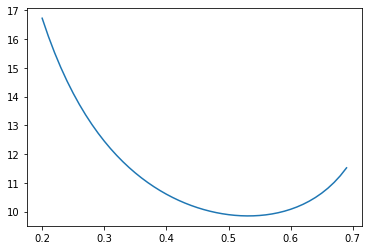

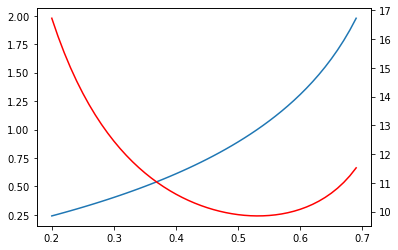

In [16]:
# Tring to play with both number of sets k\sqrt{n}, block size B, and number of queries d
lam = 80.0
d = 10.0


# The probabiliy of having at most k "heads" when tossing n independent coins with  probability p to be "heads" each.
def prAtLeast(p, n, k):
    pr = np.longdouble(0.0)
    for i in range(k):
        pr += np.longdouble(scipy.special.binom(n, i))*np.longdouble(np.power(p, i))*np.power(1-p,n-i)
    return 1.0-pr

def prAtLeastHoeffding(p, n, k):
    e = float(k)/n - p
    return np.exp(-2*e**2*n) 



def blowup(lam, d, eps):
    return -lam * np.log(1-eps-(eps**2)*2*d*np.log2(np.e)/lam)/(2*d*(eps**2)*np.log2(np.e))

eps = [0.01*i for i in range(20,70)]
bup = [ blowup(lam, d, i) for i in eps ]
k = [-np.log(1-e-(e**2)*2*d*np.log2(np.e)/lam) for e in eps]
B= [lam/(2*np.log(np.e)*e**2) for e in eps]


perr = [ prAtLeastHoeffding(np.power(np.e,-k[i]), int(B[i]), int(B[i]-d+1)) for i in range(len(eps))]

plt.plot(eps, bup)
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(eps, k)
ax2 = ax1.twinx() 
ax2.plot(eps, bup, color='red')
plt.show()

In [18]:
minBlockSizeForQueries(128, np.exp(-2), 133)

256